## Observations and Insights 

In [ ]:
# Conclusion 1
# 	Within the line graph, it appears Capomulin was effective in significantly decreasing the tumor size for the young male mouse (b128) as time progressed.  
# Conclusion 2
# 	Per the pie chart, it appears this study was well gender-balanced of mice with actual ratios were 49.0% females and 51% males in the study.
# Conclusion 3
# 	It was observed as the mice gained weight; their tumor also increased in size.  There was a strong correlation displayed during the regression analysis, where the linear regression showed a positive correlation between increase of weight and the increased of size of the tumor. 


In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sns 

# Study data files
mice_path = "data/Mouse_metadata.csv"
stdy_rslts = "data/Study_results.csv"

# Read the mouse data and the study results
mice_metadata = pd.read_csv(mice_path)
stdy_rslts = pd.read_csv(stdy_rslts)

# Combine the data into a single dataset
df = pd.merge(mice_metadata, stdy_rslts, on ="Mouse ID", how = "inner")


# Display the data table for preview
df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Unnamed: 5,Unnamed: 6,Unnamed: 7,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,NaN,NaN,24.0,0,45.000000,0
1,a203,Infubinol,Female,20,23,NaN,NaN,24.0,5,48.508468,0
2,a203,Infubinol,Female,20,23,NaN,NaN,24.0,10,51.852437,1
3,a203,Infubinol,Female,20,23,NaN,NaN,24.0,15,52.777870,1
4,a203,Infubinol,Female,20,23,NaN,NaN,24.0,20,55.173336,1


In [2]:
#Renaming column to eliminate spaces
#Source:  https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html
df.rename({"Mouse ID": "Mouse_ID"}, axis=1, inplace=True)
df.head()

,Mouse_ID,Drug Regimen,Sex,Age_months,Weight (g),Unnamed: 5,Unnamed: 6,Unnamed: 7,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,NaN,NaN,24.0,0,45.000000,0
1,a203,Infubinol,Female,20,23,NaN,NaN,24.0,5,48.508468,0
2,a203,Infubinol,Female,20,23,NaN,NaN,24.0,10,51.852437,1
3,a203,Infubinol,Female,20,23,NaN,NaN,24.0,15,52.777870,1
4,a203,Infubinol,Female,20,23,NaN,NaN,24.0,20,55.173336,1


In [3]:
# Checking the number of mice.
df.Mouse_ID.nunique()

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
df.groupby(["Mouse_ID", "Timepoint"]).size().sort_values(ascending=False)

Mouse_ID  Timepoint
g989      20           2
          15           2
          10           2
          5            2
          0            2
                      ..
i334      20           1
          15           1
          10           1
          5            1
z969      45           1
Length: 1888, dtype: int64

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
df.loc[df["Mouse_ID"] == "g989",:]

,Mouse_ID,Drug Regimen,Sex,Age_months,Weight (g),Unnamed: 5,Unnamed: 6,Unnamed: 7,Timepoint,Tumor Volume (mm3),Metastatic Sites
586,g989,Propriva,Female,21,26,NaN,NaN,NaN,0,45.000000,0
587,g989,Propriva,Female,21,26,NaN,NaN,NaN,0,45.000000,0
588,g989,Propriva,Female,21,26,NaN,NaN,NaN,5,48.786801,0
589,g989,Propriva,Female,21,26,NaN,NaN,NaN,5,47.570392,0
590,g989,Propriva,Female,21,26,NaN,NaN,NaN,10,51.745156,0
591,g989,Propriva,Female,21,26,NaN,NaN,NaN,10,49.880528,0
592,g989,Propriva,Female,21,26,NaN,NaN,NaN,15,51.325852,1
593,g989,Propriva,Female,21,26,NaN,NaN,NaN,15,53.442020,0
594,g989,Propriva,Female,21,26,NaN,NaN,NaN,20,55.326122,1
595,g989,Propriva,Female,21,26,NaN,NaN,NaN,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#Source per Alexander's suggestion
mask = df.Mouse_ID != "g989"
df_sub = df.loc[mask].reset_index(drop=True)

df_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1880 entries, 0 to 1879
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse_ID            1880 non-null   object 
 1   Drug Regimen        1880 non-null   object 
 2   Sex                 1880 non-null   object 
 3   Age_months          1880 non-null   int64  
 4   Weight (g)          1880 non-null   int64  
 5   Unnamed: 5          0 non-null      float64
 6   Unnamed: 6          0 non-null      float64
 7   Unnamed: 7          20 non-null     float64
 8   Timepoint           1880 non-null   int64  
 9   Tumor Volume (mm3)  1880 non-null   float64
 10  Metastatic Sites    1880 non-null   int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 161.7+ KB


In [7]:
# Checking the number of mice in the clean DataFrame.
df_sub.Mouse_ID.nunique()

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean = df_sub.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median = df_sub.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
var = df_sub.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
std = df_sub.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem = df_sub.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary dataframe.
smmry1 = pd.concat([mean, median, var, std, sem], axis=1)
#Renaming Columns
smmry1.columns = ["Mean", "Median", "Variance", "Std_Dvtn", "SEM"]
smmry1

,Mean,Median,Variance,Std_Dvtn,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
smmry2 = df_sub.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})
smmry2


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [10]:
 #He doesnt put on the file 
df_sub.groupby("Drug Regimen").size()

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
dtype: int64

In [11]:
#Not reviewed or added onto the file 
smmry2 = df_sub["Drug Regimen"].value_counts().reset_index()
smmry2.columns = ["Drug", "Count"]
smmry2

,Drug,Count
0,Capomulin,230
1,Ramicane,228
2,Ketapril,188
3,Naftisol,186
4,Zoniferol,182
5,Placebo,181
6,Stelasyn,181
7,Infubinol,178
8,Ceftamin,178
9,Propriva,148


## Bar and Pie Charts

In [12]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

smmry2 = df_sub["Drug Regimen"].value_counts().reset_index()
smmry2.columns = ["Drug", "Count"]
smmry2

,Drug,Count
0,Capomulin,230
1,Ramicane,228
2,Ketapril,188
3,Naftisol,186
4,Zoniferol,182
5,Placebo,181
6,Stelasyn,181
7,Infubinol,178
8,Ceftamin,178
9,Propriva,148


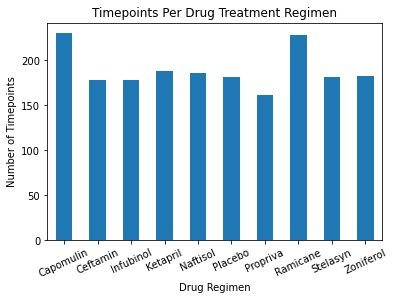

In [13]:
smmry2 = df.groupby('Drug Regimen').count()['Tumor Volume (mm3)']
bar1 = pd.DataFrame(smmry2)

one = bar1.plot.bar(legend=False,rot=25)
one
plt.ylabel("Number of Timepoints")
plt.title("Timepoints Per Drug Treatment Regimen")
plt.savefig('barplot1')

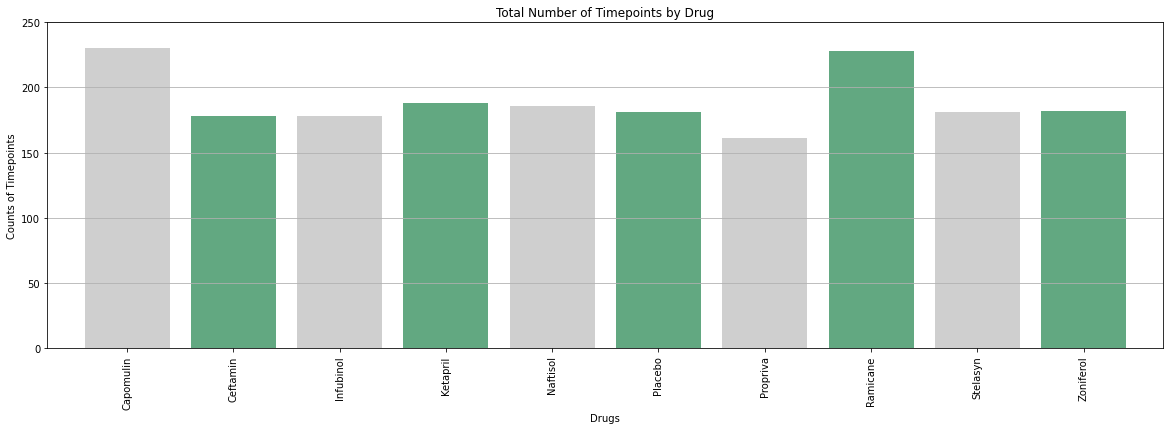

In [14]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
#Source:  https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html
# plt.figure(figsize=(20,6))
# plt.bar(smmry2.Drug, smmry2.Count,color=colors)

x_axis = np.arange(len(smmry2))

tick_locations = [x for x in x_axis]

plt.figure(figsize=(20,6))

colors = ["silver", "seagreen"]

update = bar1.reset_index()
update

plt.bar(x_axis, bar1['Tumor Volume (mm3)'], color=colors, alpha=0.75, align="center")
plt.xticks(tick_locations, update['Drug Regimen'],rotation="vertical")

plt.xlim(-0.75, len(smmry2)-.25)
plt.ylim(0, 250)


y = np.array([0, 50, 100, 150, 200])
plt.grid(axis = 'y')
plt.title("Total Number of Timepoints by Drug")
plt.xlabel("Drugs")
plt.ylabel("Counts of Timepoints")
plt.show()

In [78]:
smmry2.head(25)

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Tumor Volume (mm3), dtype: int64

In [16]:
gender = mice_metadata.groupby("Sex").count()
gender

,Mouse ID,Drug Regimen,Age_months,Weight (g),Unnamed: 5,Unnamed: 6,Unnamed: 7
Sex,,,,,,,
Female,124,124,124,124,0,0,2
Male,125,125,125,125,0,0,0


In [17]:
labels = [mice_metadata['Sex'].unique()]
update = list(gender.index)
update

['Female', 'Male']

In [18]:
size = [gender["Mouse ID"]]
size

[Sex
 Female    124
 Male      125
 Name: Mouse ID, dtype: int64]

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
smmry3 = df_sub["Sex"].value_counts().reset_index()
smmry3.columns = ["Gender", "Count"]
smmry3

pies = smmry3.Gender
pie_votes = smmry3["Count"]

colors = ["firebrick", "gold"]
explode = (0.1,0)


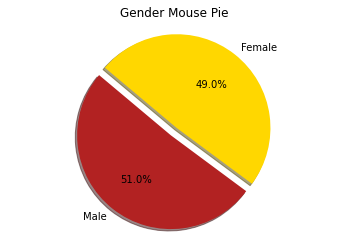

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#Source: https://smu.bootcampcontent.com/SMU-Coding-Bootcamp/SMU-DAL-VIRT-DATA-PT-12-2021-U-C/-/blob/main/01-Lesson-Plans/05-Matplotlib/1/Activities/10-Stu_PyPies/Solved/py_pie.ipynb
smmry3 = df_sub["Sex"].value_counts().reset_index()
smmry3.columns = ["Gender", "Count"]
smmry3

pies = smmry3.Gender
pie_votes = smmry3["Count"]
colors = ["firebrick","gold"]
explode = (0.1,0)

plt.pie(pie_votes, explode=explode, labels=pies, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("Gender Mouse Pie")

# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.show()

ValueError: x must be 1D

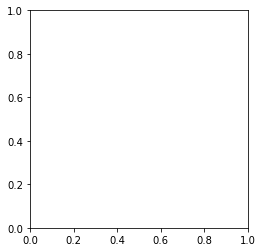

In [21]:
colors = ["gold", "firebrick"]

size = [gender["Mouse ID"]]
size

labels = [mice_metadata['Sex'].unique()]
update = list(gender.index)
update

plt.pie(size, labels=update, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.title('Male vs Female')
plt.ylabel('Gender')

plt.savefig('piechart2')
plt.show()

## Quartiles, Outliers and Boxplots

In [22]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

capo_df = df.loc[df["Drug Regimen"] == "Capomulin",:]
rami_df = df.loc[df["Drug Regimen"] == "Ramicane", :]
infu_df = df.loc[df["Drug Regimen"] == "Infubinol", :]
ceft_df = df.loc[df["Drug Regimen"] == "Ceftamin", :]
capo_df.head()

,Mouse_ID,Drug Regimen,Sex,Age_months,Weight (g),Unnamed: 5,Unnamed: 6,Unnamed: 7,Timepoint,Tumor Volume (mm3),Metastatic Sites
174,b128,Capomulin,Female,9,22,NaN,NaN,NaN,0,45.000000,0
175,b128,Capomulin,Female,9,22,NaN,NaN,NaN,5,45.651331,0
176,b128,Capomulin,Female,9,22,NaN,NaN,NaN,10,43.270852,0
177,b128,Capomulin,Female,9,22,NaN,NaN,NaN,15,43.784893,0
178,b128,Capomulin,Female,9,22,NaN,NaN,NaN,20,42.731552,0


In [23]:
tmpnts = df_sub.groupby("Mouse_ID").Timepoint.max().reset_index()
tmpnts

,Mouse_ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30
...,...,...
243,z435,10
244,z578,45
245,z581,45
246,z795,45


In [24]:
df3 = pd.merge(df_sub, tmpnts, on=["Mouse_ID", "Timepoint"], how="inner")
df3.head()

,Mouse_ID,Drug Regimen,Sex,Age_months,Weight (g),Unnamed: 5,Unnamed: 6,Unnamed: 7,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,NaN,NaN,24.0,45,67.973419,2
1,a251,Infubinol,Female,21,25,NaN,NaN,9.0,45,65.525743,1
2,a262,Placebo,Female,17,29,NaN,NaN,NaN,45,70.717621,4
3,a275,Ceftamin,Female,20,28,NaN,NaN,NaN,45,62.999356,3
4,a366,Stelasyn,Female,16,29,NaN,NaN,NaN,30,63.440686,1


In [28]:
#Source:  https://stackoverflow.com/questions/12096252/use-a-list-of-values-to-select-rows-from-a-pandas-dataframe
mask = df3["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
df4 = df3.loc[mask].reset_index(drop=True)
df4

,Mouse_ID,Drug Regimen,Sex,Age_months,Weight (g),Unnamed: 5,Unnamed: 6,Unnamed: 7,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,NaN,NaN,24.0,45,67.973419,2
1,a251,Infubinol,Female,21,25,NaN,NaN,9.0,45,65.525743,1
2,a275,Ceftamin,Female,20,28,NaN,NaN,NaN,45,62.999356,3
3,a411,Ramicane,Male,3,22,NaN,NaN,NaN,45,38.407618,1
4,a444,Ramicane,Female,10,25,NaN,NaN,NaN,45,43.047543,0
...,...,...,...,...,...,...,...,...,...,...,...
95,y769,Ceftamin,Female,6,27,NaN,NaN,NaN,45,68.594745,4
96,y793,Capomulin,Male,17,17,NaN,NaN,NaN,45,31.896238,2
97,y865,Ceftamin,Male,23,26,NaN,NaN,NaN,45,64.729837,3
98,z578,Ramicane,Male,11,16,NaN,NaN,NaN,45,30.638696,0


In [25]:
tmpnts2 = df_sub.groupby("Tumor Volume (mm3)").Timepoint.max().reset_index()
tmpnts2

,Tumor Volume (mm3),Timepoint
0,22.050126,45
1,23.343598,45
2,24.365505,40
3,25.472143,40
4,26.546993,35
...,...,...
1628,75.113288,45
1629,75.123690,45
1630,75.294936,45
1631,76.668817,45


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
# Determine outliers using upper and lower bounds

In [66]:
capomulin = capo_df.groupby('Mouse_ID').max()['Timepoint']
capo_wght = pd.DataFrame(capomulin)
capo_mrg = pd.merge(capo_wght, df, on=("Mouse_ID","Timepoint"),how="inner")
capo_mrg.head()

,Mouse_ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Unnamed: 5,Unnamed: 6,Unnamed: 7,Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,NaN,NaN,NaN,38.982878,2
1,b742,45,Capomulin,Male,7,21,NaN,NaN,NaN,38.939633,0
2,f966,20,Capomulin,Male,16,17,NaN,NaN,NaN,30.485985,0
3,g288,45,Capomulin,Male,3,19,NaN,NaN,NaN,37.074024,1
4,g316,45,Capomulin,Female,22,22,NaN,NaN,NaN,40.159220,2


In [69]:
tmrs = capo_mrg["Tumor Volume (mm3)"]

qrtls = tmrs.quantile([.25,.5,.75])
lwrqrtr = qrtls[0.25]
upqrtr = qrtls[0.75]
iqr = upqrtr-lwrqrtr

lwr_bnd = lwrqrtr - (1.5*iqr)
up_bnd = upqrtr + (1.5*iqr)
print(f"Capomulin potential outliers could be values below {lwr_bnd} and above {up_bnd} could be outliers.")

Capomulin potential outliers could be values below 20.70456164999999 and above 51.83201549 could be outliers.


In [70]:
ramicane = rami_df.groupby('Mouse_ID').max()['Timepoint']
rami_wght = pd.DataFrame(ramicane)
rami_mrg = pd.merge(rami_wght, df, on=("Mouse_ID","Timepoint"),how="inner")
rami_mrg.head()

,Mouse_ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Unnamed: 5,Unnamed: 6,Unnamed: 7,Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,NaN,NaN,NaN,38.407618,1
1,a444,45,Ramicane,Female,10,25,NaN,NaN,NaN,43.047543,0
2,a520,45,Ramicane,Male,13,21,NaN,NaN,NaN,38.810366,1
3,a644,45,Ramicane,Female,7,17,NaN,NaN,NaN,32.978522,1
4,c458,30,Ramicane,Female,23,20,NaN,NaN,NaN,38.342008,2


In [72]:
rami_tmrs = rami_mrg["Tumor Volume (mm3)"]

qrtls2 = rami_tmrs.quantile([.25,.5,.75])
lwrqrtr2 = qrtls2[0.25]
upqrtr2 = qrtls2[0.75]
iqr2 = upqrtr2-lwrqrtr2

lwr_bnd2 = lwrqrtr2 - (1.5*iqr2)
up_bnd2 = upqrtr2 + (1.5*iqr2)
print(f"Ramicane potential outliers could be values below {lwr_bnd2} and above {up_bnd2} could be outliers.")

Ramicane potential outliers could be values below 17.912664470000003 and above 54.30681135 could be outliers.


In [73]:
infubinol = infu_df.groupby('Mouse_ID').max()['Timepoint']
infu_wght = pd.DataFrame(infubinol)
infu_mrg = pd.merge(infu_wght, df, on=("Mouse_ID","Timepoint"),how="inner")
infu_mrg.head()

,Mouse_ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Unnamed: 5,Unnamed: 6,Unnamed: 7,Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,NaN,NaN,24.0,67.973419,2
1,a251,45,Infubinol,Female,21,25,NaN,NaN,9.0,65.525743,1
2,a577,30,Infubinol,Female,6,25,NaN,NaN,NaN,57.031862,2
3,a685,45,Infubinol,Male,8,30,NaN,NaN,NaN,66.083066,3
4,c139,45,Infubinol,Male,11,28,NaN,NaN,NaN,72.226731,2


In [74]:
infu_tmrs = infu_mrg["Tumor Volume (mm3)"]

qrtls3 = infu_tmrs.quantile([.25,.5,.75,1.0])
lwrqrtr3 = qrtls3[0.25]
upqrtr3 = qrtls3[0.75]
iqr3 = upqrtr3-lwrqrtr3

lwr_bnd3 = lwrqrtr3 - (1.5*iqr3)
up_bnd3 = upqrtr3 + (1.5*iqr3)
print(f"Infubinol potential outliers could be values below {lwr_bnd3} and above {up_bnd3} could be outliers.")

Infubinol potential outliers could be values below 36.83290494999999 and above 82.74144559000001 could be outliers.


In [76]:
ceftamin = ceft_df.groupby('Mouse_ID').max()['Timepoint']
ceft_wght = pd.DataFrame(ceftamin)
ceft_mrg = pd.merge(ceft_wght, df, on=("Mouse_ID","Timepoint"),how="inner")
ceft_mrg.head()

,Mouse_ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Unnamed: 5,Unnamed: 6,Unnamed: 7,Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,NaN,NaN,NaN,62.999356,3
1,b447,0,Ceftamin,Male,2,30,NaN,NaN,NaN,45.000000,0
2,b487,25,Ceftamin,Female,6,28,NaN,NaN,NaN,56.057749,1
3,b759,30,Ceftamin,Female,12,25,NaN,NaN,NaN,55.742829,1
4,f436,15,Ceftamin,Female,3,25,NaN,NaN,NaN,48.722078,2


In [77]:
ceft_tmrs = ceft_mrg["Tumor Volume (mm3)"]

qrtls4 = ceft_tmrs.quantile([.25,.5,.75,1.0])
lwrqrtr4 = qrtls4[0.25]
upqrtr4 = qrtls4[0.75]
iqr4 = upqrtr4-lwrqrtr4

lwr_bnd4 = lwrqrtr4 - (1.5*iqr4)
up_bnd4 = upqrtr4 + (1.5*iqr4)
print(f"Ceftamin potential outliers could be values below {lwr_bnd4} and above {up_bnd4} could be outliers.")

Ceftamin potential outliers could be values below 25.355449580000002 and above 87.66645829999999 could be outliers.


Empty DataFrame
Columns: [Mouse_ID, Drug Regimen, Sex, Age_months, Weight (g), Unnamed: 5, Unnamed: 6, Unnamed: 7, Timepoint, Tumor Volume (mm3), Metastatic Sites]
Index: []
Empty DataFrame
Columns: [Mouse_ID, Drug Regimen, Sex, Age_months, Weight (g), Unnamed: 5, Unnamed: 6, Unnamed: 7, Timepoint, Tumor Volume (mm3), Metastatic Sites]
Index: []
   Mouse_ID Drug Regimen     Sex  Age_months  Weight (g)  Unnamed: 5  \
15     c326    Infubinol  Female          18          25         NaN   

    Unnamed: 6  Unnamed: 7  Timepoint  Tumor Volume (mm3)  Metastatic Sites  
15         NaN         NaN          5           36.321346                 0  
Empty DataFrame
Columns: [Mouse_ID, Drug Regimen, Sex, Age_months, Weight (g), Unnamed: 5, Unnamed: 6, Unnamed: 7, Timepoint, Tumor Volume (mm3), Metastatic Sites]
Index: []


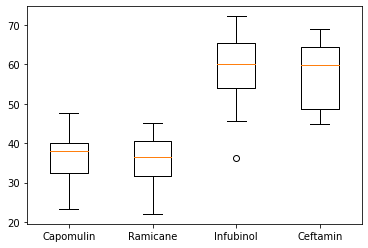

In [29]:
#Source:  Per Alexander's suggestions
#Source:  https://www.thoughtco.com/what-is-the-interquartile-range-rule-3126244#:~:text=Using%20the%20Interquartile%20Rule%20to%20Find%20Outliers&text=Multiply%20the%20interquartile%20range%20(IQR,IQR)%20from%20the%20first%20quartile.

drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

data = []

for drug in drugs:
    sub = df4.loc[df4["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    
    lwrqrtr = sub.quantile(0.25)
    upqrtr = sub.quantile(0.75)
    iqr = upqrtr-lwrqrtr
    
    
    lwr_bnd = lwrqrtr - (1.5*iqr)
    up_bnd = upqrtr + (1.5*iqr)
    
    mask = (df4["Drug Regimen"] == drug) & ((df4["Tumor Volume (mm3)"] < lwr_bnd) | (df4["Tumor Volume (mm3)"] > up_bnd))
    mavericks = df4.loc[mask]
    
    print(mavericks)
    
    data.append(sub)
    
plt.boxplot(data, labels=drugs)
plt.show()

In [79]:
sub.head()

2     62.999356
10    45.000000
11    56.057749
13    55.742829
23    48.722078
Name: Tumor Volume (mm3), dtype: float64

## Line and Scatter Plots

In [84]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# mask = df_sub["Drug Regimen"] == "Capomulin"
# data1 = df_sub.loc[mask].groupby("Mouse_ID")[["Tumor Volume (mm3)", "Weight (g)"]].mean().reset_index()
# data1

line_df = capo_df.loc[capo_df["Mouse_ID"] == "b128",:]
line_df.head()

,Mouse_ID,Drug Regimen,Sex,Age_months,Weight (g),Unnamed: 5,Unnamed: 6,Unnamed: 7,Timepoint,Tumor Volume (mm3),Metastatic Sites
174,b128,Capomulin,Female,9,22,NaN,NaN,NaN,0,45.000000,0
175,b128,Capomulin,Female,9,22,NaN,NaN,NaN,5,45.651331,0
176,b128,Capomulin,Female,9,22,NaN,NaN,NaN,10,43.270852,0
177,b128,Capomulin,Female,9,22,NaN,NaN,NaN,15,43.784893,0
178,b128,Capomulin,Female,9,22,NaN,NaN,NaN,20,42.731552,0


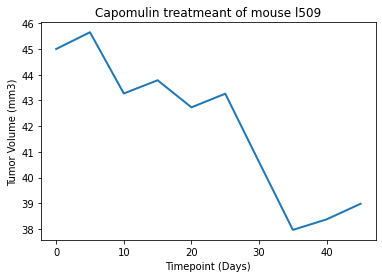

In [85]:
x_axis = line_df["Timepoint"]
tmmr = line_df["Tumor Volume (mm3)"]

plt.title('Capomulin treatmeant of mouse l509')
plt.plot(x_axis, tmmr,linewidth=2, markersize=12)
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

plt.savefig('linechart')
plt.show()

In [34]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen 
mask = df_sub["Drug Regimen"] == "Capomulin"
data2 = df_sub.loc[mask].groupby("Mouse_ID")[["Tumor Volume (mm3)", "Weight (g)"]].mean().reset_index()
data2

,Mouse_ID,Tumor Volume (mm3),Weight (g)
0,b128,41.963636,22.0
1,b742,40.083699,21.0
2,f966,36.505973,17.0
3,g288,41.990097,19.0
4,g316,44.613344,22.0
5,i557,44.805810,24.0
6,i738,39.141053,20.0
7,j119,44.465236,23.0
8,j246,43.216925,21.0
9,l509,44.434474,21.0


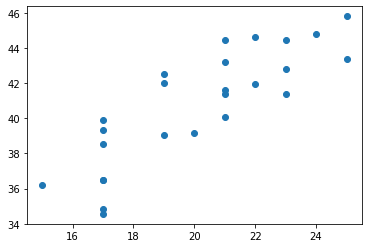

In [35]:
plt.scatter(data2["Weight (g)"], data2["Tumor Volume (mm3)"])
plt.show()

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


In [40]:
corr=round(st.pearsonr(data2['Weight (g)'],data2['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {corr}")

The correlation between mouse weight and average tumor volume is 0.84


In [38]:
mslope = 0.9544396890241045
bintercept = 21.552160532685015

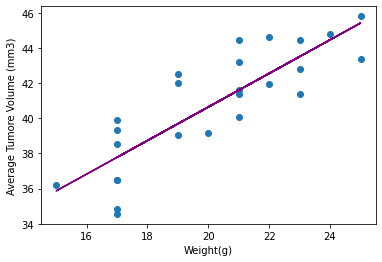

In [44]:
y_values = data2['Weight (g)']*mslope+bintercept
plt.scatter(data2['Weight (g)'],data2['Tumor Volume (mm3)'])
plt.plot(data2['Weight (g)'],y_values,color="purple")
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumore Volume (mm3)')

plt.savefig('linearregression')
plt.show()